In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
train_data= pd.read_csv('Sales_Train.csv')
print(train_data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [ ]:
print(train_data.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [ ]:
test_data = pd.read_csv('Sales_Test.csv')
df1=pd.DataFrame(test_data)


In [ ]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

In [ ]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

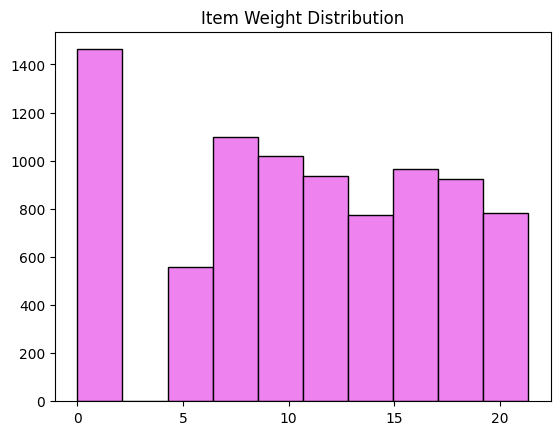

In [ ]:
plt.hist(train_data['Item_Weight'],color='violet',edgecolor='black')
plt.title('Item Weight Distribution')
plt.show()

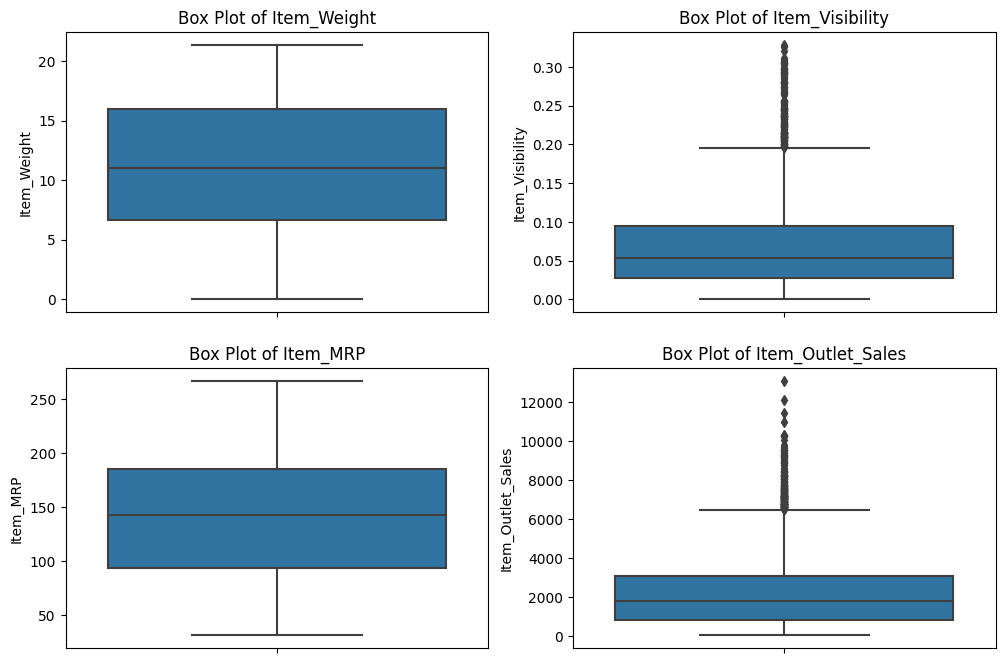

In [ ]:
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

summary_stats = train_data[numeric_columns].describe()

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=train_data, y=col)
    plt.title(f'Box Plot of {col}')


In [ ]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
unique_fat_content_values = train_data['Item_Fat_Content'].unique()
print(unique_fat_content_values)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
unique_fat_values = test_data['Item_Fat_Content'].unique()
print(unique_fat_values)

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [ ]:
for i in range(len(train_data['Item_Fat_Content'])):
    if "reg" in train_data['Item_Fat_Content'].iloc[i].lower() or "regular" in train_data['Item_Fat_Content'].iloc[i].lower():
        train_data['Item_Fat_Content'].iloc[i] = "Regular"
    else:
        train_data['Item_Fat_Content'].iloc[i] = "Low Fat"


<ipython-input-193-834776f38d2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Item_Fat_Content'].iloc[i] = "Low Fat"
<ipython-input-193-834776f38d2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Item_Fat_Content'].iloc[i] = "Regular"


In [ ]:
for i in range(len(test_data['Item_Fat_Content'])):
    if "reg" in test_data['Item_Fat_Content'].iloc[i].lower() or "regular" in test_data['Item_Fat_Content'].iloc[i].lower():
        test_data['Item_Fat_Content'].iloc[i] = "Regular"
    else:
        test_data['Item_Fat_Content'].iloc[i] = "Low Fat"


<ipython-input-194-b14147d2f475>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Item_Fat_Content'].iloc[i] = "Low Fat"
<ipython-input-194-b14147d2f475>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Item_Fat_Content'].iloc[i] = "Regular"


In [ ]:
unique_fat_content_values = train_data['Item_Fat_Content'].unique()
print(unique_fat_content_values)

['Low Fat' 'Regular']


In [ ]:
unique_fat_content_ = test_data['Item_Fat_Content'].unique()
print(unique_fat_content_)

['Low Fat' 'Regular']


In [ ]:
train_data=pd.get_dummies(train_data,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
test_data=pd.get_dummies(test_data,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
X=train_data.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
Y=train_data['Item_Outlet_Sales']


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
k=int(np.sqrt(len(X)))
knn=KNeighborsRegressor(n_neighbors=k)

In [ ]:
knn.fit(X, Y)

KNeighborsRegressor(n_neighbors=92)

In [ ]:
X_test = test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_predictions = knn.predict(X_test)


In [ ]:
submission = pd.DataFrame({'Item_Identifier': test_data['Item_Identifier'],
                            'Outlet_Identifier': test_data['Outlet_Identifier'],
                            'Item_Outlet_Sales': test_predictions})

In [ ]:
submission.to_csv('sales_predictions.csv', index=False)

In [ ]:
df = pd.read_csv('sales_predictions.csv')

In [ ]:
print(df)

     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0              FDW58            OUT049        1602.833893
1              FDW14            OUT017        1409.867685
2              NCN55            OUT010        3336.367222
3              FDQ58            OUT017        2467.476511
4              FDY38            OUT027        4175.535752
...              ...               ...                ...
5676           FDB58            OUT046        1845.040354
5677           FDD47            OUT018        2535.192713
5678           NCO17            OUT045        1808.674648
5679           FDJ26            OUT017        3484.978124
5680           FDU37            OUT045        1241.832791

[5681 rows x 3 columns]


In [ ]:
# Evaluate the model
accuracy = score(X_test, test_predictions)
print("Accuracy:", accuracy)

NameError: ignored

In [ ]:
print(test_data.columns)
predicted_sales = df['Item_Outlet_Sales']

